<center>
    <h1><b>Feed Forward Neural Networks for Natural Language Processing<b></h1>
</center>

In [2]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

dataset_base_filepath = '../Data/Raw' # "/kaggle/input/ai-2-deep-learning-for-nlp-homework-1"
images_base_filepath = '../imgs' # "/kaggle/input/images"

# Load all the dataset files using pandas and store inside some dataframe variables
train_df = pd.read_csv(f'{dataset_base_filepath}/train_dataset.csv')
val_df = pd.read_csv(f'{dataset_base_filepath}/val_dataset.csv')
test_df = pd.read_csv(f'{dataset_base_filepath}/test_dataset.csv')

# Reduce the data sizes
size=1
train_df = train_df.sample(frac=size)
val_df = val_df.sample(frac=size)
# test_df = test_df.sample(frac=size)

print(train_df.shape, val_df.shape, test_df.shape)

(148388, 3) (42396, 3) (21199, 2)


In [3]:
train_df.head()

,ID,Text,Label
27984,57492,@solidgame I saw te show too,1
115098,102683,@danafreak Not a &quot;Pinky and The Brain&quo...,0
9522,184644,@cherry_darlin the funky funky eyepatch,1
17612,73033,@fromser That's great to hear! Take lots of p...,1
134309,73806,@coreyellerbe I know. How far the Cubs have ...,1


In [14]:
import os
import re
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
import contractions

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

!unzip /home/antonis/nltk_data/corpora/wordnet.zip -d /home/antonis/nltk_data/corpora/

def clean_text(text: str) -> str:
    text = text.lower() # Convert to lowercase
    text = contractions.fix(text) # Expand contractions
    text = re.sub(r"http\S+|www\S+|https\S+", "", text) # Remove url links
    text = re.sub(r"@\w+", "", text) # Remove mentions
    text = re.sub(r"#(\w+)", "", text) # Remove hastags
    text = re.sub(r"(?<!\.)\.(?!\.)|[^\w\s\?\!]", "", text)
    text = re.sub(r"\.\.\.", " ... ", text)  # Ensure '...' is treated as a single token
    
    text = re.sub(r"&[^;\s]+;", "", text) # Remove special characters
    text = re.sub(r"\s+", " ", text) # Remove extra spaces
    
    text = re.sub(r"\d+", "", text)
    
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words] # Apply stemming
    lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words] # Apply lemmatization
    text = " ".join(lemmatized_words)
    
    return text

Archive:  /home/antonis/nltk_data/corpora/wordnet.zip
   creating: /home/antonis/nltk_data/corpora/wordnet/
  inflating: /home/antonis/nltk_data/corpora/wordnet/lexnames  
  inflating: /home/antonis/nltk_data/corpora/wordnet/data.verb  
  inflating: /home/antonis/nltk_data/corpora/wordnet/index.adv  
  inflating: /home/antonis/nltk_data/corpora/wordnet/adv.exc  
  inflating: /home/antonis/nltk_data/corpora/wordnet/index.verb  
  inflating: /home/antonis/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /home/antonis/nltk_data/corpora/wordnet/data.adj  
  inflating: /home/antonis/nltk_data/corpora/wordnet/index.adj  
  inflating: /home/antonis/nltk_data/corpora/wordnet/LICENSE  
  inflating: /home/antonis/nltk_data/corpora/wordnet/citation.bib  
  inflating: /home/antonis/nltk_data/corpora/wordnet/noun.exc  
  inflating: /home/antonis/nltk_data/corpora/wordnet/verb.exc  
  inflating: /home/antonis/nltk_data/corpora/wordnet/README  
  inflating: /home/antonis/nltk_data/corpora/wordnet

[nltk_data] Downloading package wordnet to /home/antonis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/antonis/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/antonis/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



  inflating: /home/antonis/nltk_data/corpora/wordnet/data.adv  
  inflating: /home/antonis/nltk_data/corpora/wordnet/index.noun  
  inflating: /home/antonis/nltk_data/corpora/wordnet/adj.exc  


In [15]:
import time

# Apply the cleaning function to every dataset file and create a new column with the modified text
start_time = time.time()
train_df["Cleaned_text"] = train_df["Text"].apply(clean_text)
val_df["Cleaned_text"] = val_df["Text"].apply(clean_text)
test_df["Cleaned_text"] = test_df["Text"].apply(clean_text)
end_time = time.time()

print(f"Datasets were cleaned in {end_time - start_time} seconds.")

train_df.head(10)

Datasets were cleaned in 37.438220500946045 seconds.


,ID,Text,Label,Cleaned_text
27984,57492,@solidgame I saw te show too,1,i saw te show too
115098,102683,@danafreak Not a &quot;Pinky and The Brain&quo...,0,not a quotpinki and the brainquot fan i see
9522,184644,@cherry_darlin the funky funky eyepatch,1,the funki funki eyepatch
17612,73033,@fromser That's great to hear! Take lots of p...,1,that is great to hear! take lot of pics! macbe...
134309,73806,@coreyellerbe I know. How far the Cubs have ...,1,i know how far the cub have fallen
32417,113349,OK time for a lovely Sunday afternoon nap. I ...,1,ok time for a love sunday afternoon nap i am c...
98649,182229,in shock about David Carradine's death (http:/...,0,in shock about david carradin death amp wonder...
43635,124712,will be going off soon,1,will be go off soon
79605,1892,@nicksantino are you having any other 'random ...,0,are you have ani other random acoust show soon...
50359,92216,@JamesEYB Dang James....We already do! I do...,1,dang jamesw alreadi do! i do not know about yo...


In [16]:
import nltk
from nltk import data
from nltk.tokenize import word_tokenize
import time

warnings.filterwarnings("ignore", category=UserWarning, module="nltk")

def remove_stopwords(text: str) -> str:
    # Remove the stopwords from the original text
    stop_words = set(
        ["i", "to", "the", "is", "a", "you", "my", "and", 
         "it", "am", "for", "in", "of", "that", "on", "so", "me"]
    )
    word_tokens = word_tokenize(text)
    filtered_words = [word for word in word_tokens if word not in stop_words]

    return " ".join(filtered_words)

start_time = time.time()
train_df['Cleaned_text'] = train_df['Cleaned_text'].apply(remove_stopwords)
val_df['Cleaned_text'] = val_df['Cleaned_text'].apply(remove_stopwords)
test_df['Cleaned_text'] = test_df['Cleaned_text'].apply(remove_stopwords)
end_time = time.time()


print(f"Stopwords were removed in {end_time - start_time} seconds.")

Stopwords were removed in 8.255356788635254 seconds.


In [17]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2025-04-14 16:48:42--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-04-14 16:48:42--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-14 16:48:43--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [116]:
import numpy as np

embeddings_dim = 300

def load_glove(glove_path):
  embeddings = {}
  with open(glove_path, 'r', encoding='utf-8') as f:
    for line in f:
      values = line.split()
      word = values[0]
      vector = np.asarray(values[1:], dtype='float32')
      embeddings[word] = vector
      
  return embeddings

glove_path = f'glove.6B.{embeddings_dim}d.txt'
embeddings = load_glove(glove_path)

In [117]:
def get_w2v_dictionary(glove_path, num_words=22):
  dictionary = {}
  
  # Try to open the file and read the first num_words lines and store them in the dictionary
  try:
    with open(glove_path, 'r', encoding='utf-8') as f:
      for i, line in enumerate(f):
        if i >= num_words:
          break
        parts = line.strip().split()
        word = parts[0]
        vector = list(map(float, parts[1:]))
        dictionary[word] = f"[{', '.join(map(str, vector))}]"
        
  # Handle the case where the file cannot be opened or is not found
  except Exception as e:
    print(f"Error: File {glove_path} not found or cannot be opened.")
    
  return dictionary

# Read the contents of the glove file and store them in a dictionary
glove_path = f'glove.6B.{embeddings_dim}d.txt'
w2v_dictionary = get_w2v_dictionary(glove_path, num_words=22)

# Create a dataframe from the dictionary
w2v_df = pd.DataFrame.from_dict(w2v_dictionary, orient='index')
w2v_df.reset_index(inplace=True)
w2v_df.columns = ['Word', 'Vector']

w2v_df.head(10)

,Word,Vector
0,the,"[0.04656, 0.21318, -0.0074364, -0.45854, -0.03..."
1,",","[-0.25539, -0.25723, 0.13169, -0.042688, 0.218..."
2,.,"[-0.12559, 0.01363, 0.10306, -0.10123, 0.09812..."
3,of,"[-0.076947, -0.021211, 0.21271, -0.72232, -0.1..."
4,to,"[-0.25756, -0.057132, -0.6719, -0.38082, -0.36..."
5,and,"[0.038466, -0.039792, 0.082747, -0.38923, -0.2..."
6,in,"[-0.44399, 0.12817, -0.25247, -0.18582, -0.166..."
7,a,"[-0.29712, 0.094049, -0.096662, -0.344, -0.184..."
8,"""","[0.6947, 0.22184, 0.10526, 0.012382, -0.2558, ..."
9,'s,"[-0.001272, 0.36514, -0.077363, -0.26559, 0.17..."


In [ ]:
# Find the most similar words to a given word

def find_most_similar_words(word, embeddings, top_n=5):
  if word not in embeddings:
    print(f"Word '{word}' not found in embeddings.")
    return []

  word_vector = embeddings[word]
  similarities = {}

  for other_word, other_vector in embeddings.items():
    if other_word != word:
      similarity = np.dot(word_vector, other_vector) / (np.linalg.norm(word_vector) * np.linalg.norm(other_vector))
      similarities[other_word] = similarity

  # Sort the words by similarity and return the top_n most similar words
  most_similar_words = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:top_n]
  return most_similar_words

# Get the most similar words to "technology"
example_word = 'technology'
most_similar_words = find_most_similar_words(example_word, embeddings, top_n=10)

print(f'Most semantically similar to word {example_word}:')
print(f'\n{" "*5}word{" "*10}  similarity score')
print(f'{"="*43}')
for w in most_similar_words:
  print(f'{" "*5}{w[0]:15}{w[1]}')

Most semantically similar to word technology:

     word            similarity score
     technologies   0.778076708316803
     tech           0.6464561223983765
     technological  0.6369521617889404
     computer       0.6198545098304749
     science        0.6055578589439392
     engineering    0.6021392345428467
     innovation     0.5855401754379272
     research       0.5715996026992798
     industry       0.5703537464141846
     software       0.5702804923057556


In [126]:
# Calculate the semantics: word1 - word2 and word1 + word2
word1, word2 = 'apple', 'technology'

def euclidean_distance(v1, v2):
  return np.linalg.norm(v1 - v2)

def find_closest_word(target_vector, excluded_words, embeddings):
  min_distance = float('inf')
  closest_word = None
  for other_word, other_vector in embeddings.items():
    if other_word in excluded_words:
      continue
    current_distance = euclidean_distance(target_vector, other_vector)
    if current_distance < min_distance:
      min_distance = current_distance
      closest_word = other_word
  return closest_word

if word1 in embeddings and word2 in embeddings:
  word1_vector = embeddings[word1]
  word2_vector = embeddings[word2]

  # Calculate word1 - word2
  result_vector_minus = word1_vector - word2_vector
  closest_word_minus = find_closest_word(result_vector_minus, [word1, word2], embeddings)
  print(f'Closest word to {word1} - {word2} is: {closest_word_minus}')

  # Calculate word1 + word2
  result_vector_plus = word1_vector + word2_vector
  closest_word_plus = find_closest_word(result_vector_plus, [word1, word2], embeddings)
  print(f'Closest word to {word1} + {word2} is: {closest_word_plus}')

Closest word to apple - technology is: cherry
Closest word to apple + technology is: computer


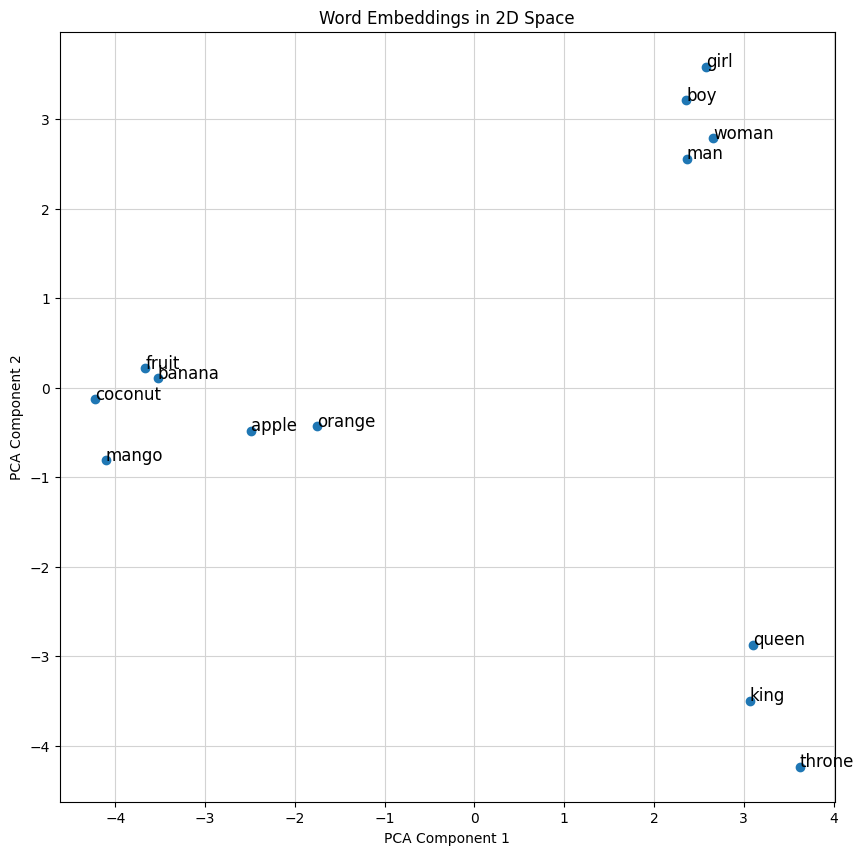

In [128]:
# Plot some words in 2D space
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_words_2d(words, embeddings):
  # Get the vectors for the words
  word_vectors = np.array([embeddings[word] for word in words if word in embeddings])
  
  # Perform PCA to reduce dimensionality to 2D
  pca = PCA(n_components=2)
  reduced_vectors = pca.fit_transform(word_vectors)
  
  # Plot the words in 2D space
  plt.figure(figsize=(10, 10))
  plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])
  
  for i, word in enumerate(words):
    if word in embeddings:
      plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=12)
  
  plt.title("Word Embeddings in 2D Space")
  plt.xlabel("PCA Component 1")
  plt.ylabel("PCA Component 2")
  plt.grid(color='lightgrey')
  plt.show()
  
# Example words to plot
words_to_plot = ["boy", "girl", "man", "woman", "king", "throne", "queen", "banana", "apple", "mango", "fruit", "coconut", "orange"]
plot_words_2d(words_to_plot, embeddings)


In [43]:
def tweet_to_vector(tokens, embeddings, dim):
  vectors = []
  for token in tokens:
    if token in embeddings:
      vectors.append(embeddings[token])
  
  if len(vectors) == 0:
    return np.zeros(dim)
  
  return np.mean(vectors, axis=0)

train_df['vectors'] = train_df['Cleaned_text'].apply(lambda x: tweet_to_vector(x.split(), embeddings, embeddings_dim))
val_df['vectors'] = val_df['Cleaned_text'].apply(lambda x: tweet_to_vector(x.split(), embeddings, embeddings_dim))
test_df['vectors'] = test_df['Cleaned_text'].apply(lambda x: tweet_to_vector(x.split(), embeddings, embeddings_dim))

In [44]:
print(train_df['vectors'].shape)

(148388,)
